In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df_penguin = sns.load_dataset('penguins')

In [4]:
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df_penguin['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df_penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
from sklearn.model_selection import train_test_split

X = df_penguin.drop('species', axis=1)
y = df_penguin['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [8]:
df_penguin_train = pd.concat([X_train, y_train], axis=1)
df_penguin_test = pd.concat([X_test, y_test], axis=1)

In [9]:
df_penguin_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
173,Dream,48.5,17.5,191.0,3400.0,Male,Chinstrap
272,Biscoe,45.1,14.4,210.0,4400.0,Female,Gentoo
178,Dream,50.5,18.4,200.0,3400.0,Female,Chinstrap
174,Dream,43.2,16.6,187.0,2900.0,Female,Chinstrap
136,Dream,35.6,17.5,191.0,3175.0,Female,Adelie


<AxesSubplot:>

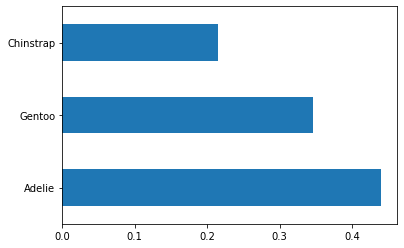

In [10]:
df_penguin_train['species'].value_counts(normalize=True).plot(kind='barh')

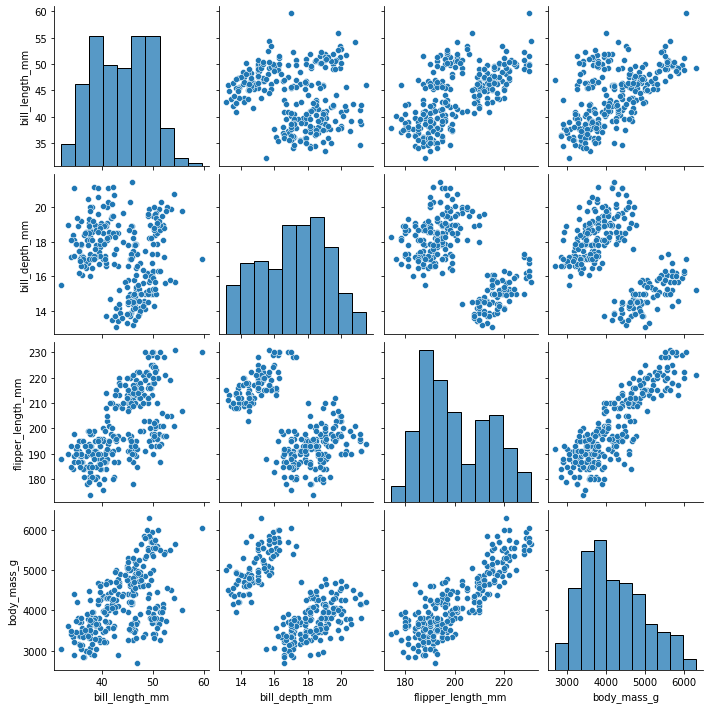

In [11]:
sns.pairplot(X_train)

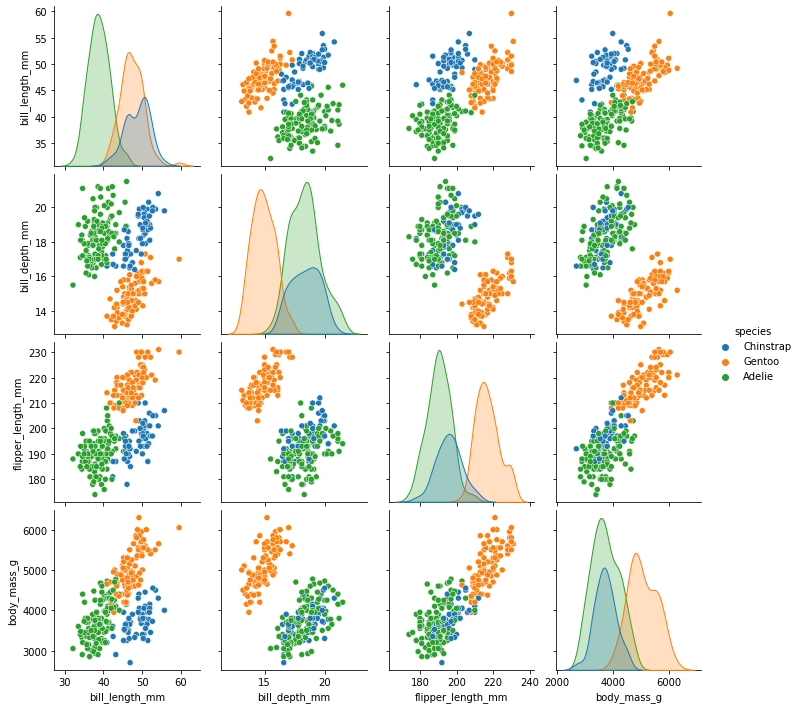

In [12]:
sns.pairplot(df_penguin_train, hue='species')

<AxesSubplot:xlabel='island', ylabel='count'>

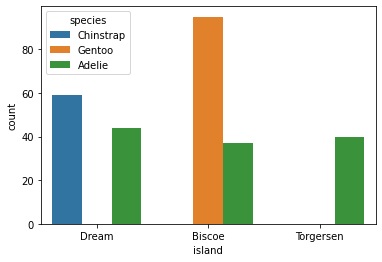

In [13]:
sns.countplot(x='island', hue='species', data=df_penguin_train)

<AxesSubplot:xlabel='sex', ylabel='count'>

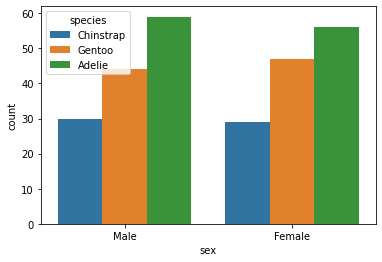

In [14]:
sns.countplot(x='sex', hue='species', data=df_penguin_train)

In [15]:
X_train.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [80]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

ctg_cols = ['island', 'sex']
encoder = OneHotEncoder()

print(X_train[ctg_cols].dropna().drop_duplicates())

X_train_ctg_encoded = encoder.fit_transform(X_train[ctg_cols]).toarray()

        island     sex
173      Dream    Male
272     Biscoe  Female
178      Dream  Female
287     Biscoe    Male
120  Torgersen  Female
73   Torgersen    Male


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# data preparation
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
ctg_cols = ['island', 'sex']

# impute missing values (with median for nums and with mode for ctg)
num_imputer = SimpleImputer(strategy='median')
ctg_imputer = SimpleImputer(strategy='most_frequent')

X_train_num_imputed = num_imputer.fit_transform(X_train[num_cols])
X_train_ctg_imputed = ctg_imputer.fit_transform(X_train[ctg_cols])
X_test_num_imputed = num_imputer.transform(X_test[num_cols])
X_test_ctg_imputed = ctg_imputer.transform(X_test[ctg_cols])

# scaling
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

# encoding
encoder = OneHotEncoder()
X_train_ctg_encoded = encoder.fit_transform(X_train_ctg_imputed).toarray()
X_test_ctg_encoded = encoder.transform(X_test_ctg_imputed).toarray()

# combine
X_train_prep = np.concatenate([X_train_num_scaled, X_train_ctg_encoded], axis=1)
X_test_prep = np.concatenate([X_test_num_scaled, X_test_ctg_encoded], axis=1)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# with pipeline
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
ctg_cols = ['island', 'sex']

num_imputer = SimpleImputer(strategy='median')
ctg_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
encoder = OneHotEncoder()

# 1. impute missing value in num cols ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm') with median
# 2. impute missing value in ctg col ('sex') with mode
# 3. scale num cols ('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm')
# 4. encode ctg cols ('island', 'sex')

# pipeline = Pipeline([
#     ('num_imputer', num_imputer),
#     ('ctg_imputer', ctg_imputer),
#     ('scaler', scaler),
#     ('encoder', encoder)
# ])

num_pipeline = Pipeline([
    ('num_imputer', num_imputer),
    ('scaler', scaler)
])

ctg_pipeline = Pipeline([
    ('ctg_imputer', ctg_imputer),
    ('encoder', encoder)
])

# col_transformer = ColumnTransformer([
#     ('num_prep', num_pipeline, num_cols), # 3 cols
#     ('ctg_pipeline', ctg_pipeline, ctg_cols) # 5 cols
# ])

# final_pipeline = Pipeline([
#     ('col_transformer', col_transformer),
#     ('log_reg', LogisticRegression())
# ])

col_transformer = ColumnTransformer([
    ('num_imputer', num_imputer, num_cols), # 3 col
    ('ctg_imputer', ctg_imputer, ['sex']), # 1 col
    ('scaler', scaler, num_cols), # 3 col
    ('encoder', encoder, ctg_cols) #6 col?
])

X_train_prep = col_transformer.fit_transform(X_train)
X_test_prep = col_transformer.transform(X_test)
# final_pipeline.fit(X_train, y_train)

# log_reg = LogisticRegression()
# log_reg.fit(X_train_prep, y_train)

In [72]:
X_train_prep.shape

(275, 13)

In [66]:
col_transformer.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('num_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['bill_length_mm', 'bill_depth_mm',
                                  'flipper_length_mm']),
                                ('ctg_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['sex']),
                                ('scaler', StandardScaler(),
                                 ['bill_length_mm', 'bill_depth_mm',
                                  'flipper_length_mm']),
                                ('encoder', OneHotEncoder(),
                                 ['island', 'sex'])])>

In [60]:
# from sklearn.model_selection import cross_val_score

# cross_val_score(final_pipeline, X_train, y_train, cv=10).mean()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# train some models and compare them with cv
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# need to check possible information leakage due to cross validation
print('Logistic Regression CV accuracy: ', cross_val_score(log_reg, X_train_prep, y_train, cv=10).mean())
print('Decision Tree CV accuracy: ', cross_val_score(dt, X_train_prep, y_train, cv=10).mean())
print('KNN CV accuracy: ', cross_val_score(knn, X_train_prep, y_train, cv=10).mean())

Logistic Regression CV accuracy:  0.9892857142857142
Decision Tree CV accuracy:  0.9675925925925926
KNN CV accuracy:  0.9928571428571429


In [36]:
# # we pick KNN as the best model in this problem
# knn = KNeighborsClassifier()
# knn.fit(X_train_prep, y_train)

In [37]:
# knn.predict(X_test_prep)

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(4,200)),
    'min_samples_split': [2,4,6,8]
}


# grid_search = GridSearchCV(dt, param_grid, cv=10)
random_search = RandomizedSearchCV(dt, param_grid, n_iter=10, cv=10)
# grid_search.fit(X_train_prep, y_train)
random_search.fit(X_train_prep, y_train)
# random_search

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'min_samples_split': [2, 4, 6, 8]})

In [55]:
# pd.DataFrame(grid_search.cv_results_).head()
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002507,0.000552,0.000898,0.000539,8,5,entropy,"{'min_samples_split': 8, 'max_depth': 5, 'crit...",1.000000,0.928571,...,0.964286,0.964286,0.962963,1.0,0.925926,0.962963,0.962963,0.963624,0.023019,5
1,0.003105,0.001768,0.001097,0.000824,2,15,gini,"{'min_samples_split': 2, 'max_depth': 15, 'cri...",0.964286,0.928571,...,0.964286,0.964286,0.962963,1.0,1.000000,0.962963,1.000000,0.971164,0.021523,2
2,0.002700,0.000782,0.001001,0.000895,6,15,entropy,"{'min_samples_split': 6, 'max_depth': 15, 'cri...",1.000000,0.928571,...,0.928571,0.964286,0.962963,1.0,0.925926,0.962963,0.962963,0.952910,0.032228,10
3,0.003100,0.002072,0.000801,0.000401,8,15,entropy,"{'min_samples_split': 8, 'max_depth': 15, 'cri...",1.000000,0.928571,...,0.964286,0.964286,0.962963,1.0,0.925926,0.962963,0.962963,0.956481,0.031299,8
4,0.002296,0.001263,0.000715,0.000470,4,5,entropy,"{'min_samples_split': 4, 'max_depth': 5, 'crit...",1.000000,0.928571,...,0.928571,0.964286,0.962963,1.0,1.000000,0.925926,1.000000,0.960317,0.037511,7
5,0.002198,0.001991,0.000801,0.000400,4,10,entropy,"{'min_samples_split': 4, 'max_depth': 10, 'cri...",1.000000,0.928571,...,0.892857,0.928571,0.962963,1.0,1.000000,1.000000,1.000000,0.960582,0.043586,6
6,0.001899,0.000538,0.000801,0.000874,8,15,gini,"{'min_samples_split': 8, 'max_depth': 15, 'cri...",1.000000,0.928571,...,1.000000,0.964286,0.962963,1.0,0.925926,0.962963,0.962963,0.967196,0.025483,4
7,0.002299,0.000639,0.000899,0.000300,8,10,entropy,"{'min_samples_split': 8, 'max_depth': 10, 'cri...",1.000000,0.928571,...,0.964286,0.964286,0.962963,1.0,0.925926,0.962963,0.962963,0.956481,0.031299,8
8,0.001900,0.000539,0.000500,0.000500,2,10,gini,"{'min_samples_split': 2, 'max_depth': 10, 'cri...",0.964286,0.928571,...,0.964286,0.964286,0.962963,1.0,1.000000,0.962963,0.962963,0.967460,0.019316,3
9,0.001901,0.000300,0.000800,0.000400,4,10,gini,"{'min_samples_split': 4, 'max_depth': 10, 'cri...",1.000000,0.964286,...,0.964286,0.964286,0.962963,1.0,1.000000,0.962963,1.000000,0.978307,0.017719,1


In [57]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=4)

In [58]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [49]:
dt_tuned = grid_search.best_estimator_
# dt_tuned.fit(X_train_prep, y_train)

In [50]:
print('Decision Tree CV accuracy (after tuning): ', cross_val_score(dt_tuned, X_train_prep, y_train, cv=10).mean())

Decision Tree CV accuracy (after tuning):  0.9710317460317462


In [ ]:
1. Pipeline & Column Transformer
2. Model Selction based on Cross Validation result
3. Hyperparameter tuning with Grid Search/Random Search CV